In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as TF


In [2]:
observations =10000

xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

generated_inputs= np.column_stack((xs,zs))

noise=np.random.uniform(-1,1,(observations,1))

generated_targets=13*xs+7*zs-12+noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

In [3]:
Traning_data=np.load('TF_intro.npz')

In [4]:
inputs_size=2
outputs_size=1

model=TF.keras.Sequential([
                    TF.keras.layers.Dense(outputs_size)
                        ])
model.compile(optimizer='SGD',loss='mean_squared_error')

model.fit(Traning_data['inputs'],Traning_data['targets'],epochs=100,verbose=2)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/100
10000/10000 - 1s - loss: 38.8771
Epoch 2/100
10000/10000 - 0s - loss: 0.3415
Epoch 3/100
10000/10000 - 0s - loss: 0.3441
Epoch 4/100
10000/10000 - 0s - loss: 0.3442
Epoch 5/100
10000/10000 - 0s - loss: 0.3430
Epoch 6/100
10000/10000 - 0s - loss: 0.3436
Epoch 7/100
10000/10000 - 0s - loss: 0.3427
Epoch 8/100
10000/10000 - 0s - loss: 0.3437
Epoch 9/100
10000/10000 - 0s - loss: 0.3453
Epoch 10/100
10000/10000 - 0s - loss: 0.3426
Epoch 11/100
10000/10000 - 0s - loss: 0.3421
Epoch 12/100
10000/10000 - 0s - loss: 0.3433
Epoch 13/100
10000/10000 - 0s - loss: 0.3436
Epoch 14/100
10000/10000 - 0s - loss: 0.3419
Epoch 15/100
10000/10000 - 0s - loss: 0.3422
Epoch 16/100
10000/10000 - 0s - loss: 0.3445
Epoch 17/100
10000/10000 - 0s - loss: 0.3430
Epoch 18/100
10000/10000 - 0s - loss: 0.3431
Epoch 19/100
10000/10000 - 0s - loss: 0.3425
Epoch 20/100
10000/10000 - 0s - los

In [5]:
model.layers[0].get_weights()

[array([[13.013411 ],
        [ 6.9938803]], dtype=float32),
 array([-12.004206], dtype=float32)]

In [7]:
model.predict_on_batch(Traning_data['inputs']).round(1)

array([[125.6],
       [ 46.9],
       [-47.2],
       ...,
       [-88.5],
       [-52.8],
       [-57.4]], dtype=float32)

In [8]:
Traning_data['targets'].round(1)

array([[126. ],
       [ 47.7],
       [-47.1],
       ...,
       [-87.9],
       [-53. ],
       [-56.7]])

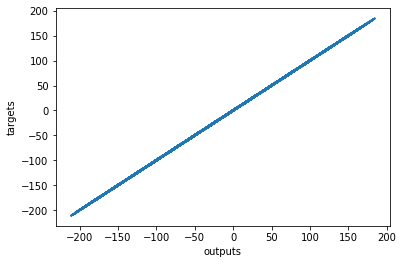

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(Traning_data['inputs'])),np.squeeze(Traning_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()